# 1. Astronomical Imaging & Functional Programming

<hr>

**Programming Topics**: Functions, optional arguments, args and kwargs, documentation 

**Science Topics**: filters/bands, multiband data, combinations, and continuum subtraction

**Specialized Tools**: `Astropy` tools for working with image data (`SkyCoord`, `units`, `WCS`, and `Cutout2D`)

# Functional Programming
<hr>
Everyone here is familiar with the idea of functions in Python. We import them (e.g., `np.array()`) and use them. We can also define our own functions. The standard function in python looks like

In [1]:
def func(args):
    '''
    Description of A function
    '''
    # Do something in the function
    return #something

Why write functional code? What concrete benefits arise from writing functions in our code?


**My Answers**
<hr>

- Prevents repetition of code that is run often
- Allows for manual or automatic unit testing (ensuring each definable task in the code is working as expected)
- Allows for double documentation. Functions themselves encourage docstrings, which helps users (you included) understand your function's purpose. It also means your "main" code is composed fewer lines, due to calling functions instead. This makes the primary code easier to read, especially if the functions are well-named. 
- Functions are modular: you can import functions from one python file to another, the basic structure of package creation. (also works for classes) 
- Functions encourage simple outputs
- Functions create regions of local scope, which helps prevent mucking up your global namespace

## How to Write a Function 

Besides the formatting, how do we actually construct good functions? How do we do so efficiently? 

- **Playtest** code in the **global namespace** (i.e., your script or notebook). When it's working, **move into a function**. 
- Functions should be **< 50 lines**, and **ideally < 20**. They should handle **simple, repetitive operations** that don't have many steps
- A function **wrapping** several smaller functions is better than one long function 
- Anytime you find yourself **copying and pasting code**, you could probably use a function 
- **Don't** write **detailed docstrings** until the function is **"mature"**. #Comments throughout are sufficient. 
- Because you won't have to type them out often, variable names in functions can be **highly descriptive.**
- It's better to let the **code** guide **when to make** functions, rather than forcing all code into functions *a priori*.

## Documentation 

Documentation is one of the **most important things** we create as programmers. It is the **number 1** descriminator in whether a codebase remains useful over any extended period of time. 

I consider all of the following documentation 

- variable names 
- function and class names 
- #inline comments
- docstrings for classes, methods, and functions




Docstrings are the most formal form of documentation. These are descriptions of scripts, methods, classes, and functions which are typically written in one of several standard methods. 

The docstring styling is important, because there are automated programs such as [Sphinx](https://www.sphinx-doc.org/en/master/) and [mkdocs](https://www.mkdocs.org/) which can analyze your code base and construct documentation websites for you.  

We'll be using the [numpy/scipy](https://numpydoc.readthedocs.io/en/latest/format.html) in this class. It is a standard styling which is compatible with the tools listed above and is easy to write and read. It looks like this:

In [2]:
def func(arg1,arg2,arg3=0,**kwargs):
    '''
    A function which does something with three optional arguments and some keyword arguments
    
    Parameters
    ----------
    arg1: float
        description of arg1, which has been indicated to be a float
    arg2: array_like
        description of arg2, which has been indicated to be an array 
    arg3: int, optional
        description of arg3, an optional input. Default: 0 
    **kwargs: dict_like, optional
        Any additional keyword arguments will be stored in the functions kwargs dictionary.
    
    Returns
    -------
    output1, output2: int, float
        This function returns 2 outputs, one an int and one a float, apparently. 
    
    Notes
    -----
    Requires numpy version >1.15.5
    Notes go here 
    
    See Also
    --------
    Any links to other functions can go here 
    '''
    pass

I definitely don't write that level of documentation for most of my functions (at least not as I'm writing them). My docs, when I'm playtesting code, usually look more like 

In [3]:
def func(a,b,c):
    # Does Calculation X using a,b,c, which should be floats
    pass

Then, once the function has been fleshed out, and I know for (mostly) sure that the inputs and outputs I want are stable, I'll write up the more official docstring from above. In writing code for myself or colleagues (i.e., not distributed), notes and see also is generally overkill. But the basic docs laying out parameters and returns is worth doing. 
[Here's a website](https://prospect.readthedocs.io/en/latest/api/models_api.html) built using automatic docstrings. 

# \*Args and \*\*kwargs 

The simplest version of a Python function includes several **ordered** inputs, defined in the `def` line of the function definition. One step higher in complexity, after the ordered arguments, one can add **optional** or **keyword** arguments, which have set defaults but can be overwritten by the user by entering an argument with the appropriate keyword, via `kw=something`. 

These methods are likely familiar. Less familiar may be the use of `*args` and `**kwargs` as inputs to your functions.

In the simplest sense, these arguments are **packing** and **unpacking** variables. As a reminder about unpacking and packing, let's look at an example:

In [4]:
theta = (1,5,3,6,7,3)
def func(theta):
    a,b,c,d,e,f = theta

In the code above, we "packed" theta into an iterable containing subparts, and read this container into `func`. We then unpacked it by setting 6 variables all equal to `theta`. This works only if the number of variables equals the length of the input.

Tuples are the default for packing things, but any simple iterable (like a list) work. Here's another example:

In [5]:
def func():
    a = 2
    b = 5
    return a,b

By returning `a,b`, we are actually telling python to pack the outputs into a tuple. If we then run out function by setting a single variable, via `out = func()`, then `out` will be a tuple containing two items. But we can also run our function via `c,d = func()`, and it will unpack that tuple directly into the two variables specified. 

As a random side note, one of our favorite functions, `np.where()`, returns a `tuple` containing the indices of interest and then, usually, nothing. Hence, you'll often see people run where as 

In [ ]:
w, = np.where(somthing>something_else)

That comma tells python to unpack the tuple, and the lack of a second variable tells it to simply dump whatever the second output is. 

Packing and unpacking are key to our use of args and kwargs in functions. But first, why use them at all?

- You may want to allow any number of inputs to your function 
- You may want to pass arguments from your function to another. 

Matplotlib is a classic example of a library with many `**kwarg` enabled functions. When we use wrappers that conveniently allow a complex plot to be made in one line, we still want to be able to put in parameters that alter or set more granular settings. 

By adding `**kwargs` as an optional input to our functions, the user can supply any number of extra keyword/arg pairs. These sit harmlessly in a dictionary called `kwargs`. If then inside our function we call another function which has `**kwargs` enabled, we can then feed our `kwargs` dict into that function, and unpack it into keyword argument pairs again with the `**`. 

**Example**

In [30]:
import matplotlib.pyplot as plt
def plot_wrapper(x,y,**kwargs):
    fig, ax = plt.subplots()
    ax.plot(x,y,color='C0',**kwargs)

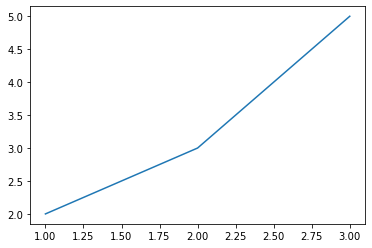

In [31]:
x = [1,2,3]
y = [2,3,5]
plot_wrapper(x,y)

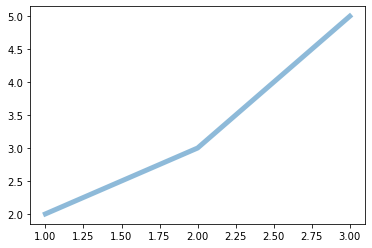

In [33]:
x = [1,2,3]
y = [2,3,5]
plot_wrapper(x,y,lw=5,alpha=0.5)

Notice that when I run `plot_wrapper`, I'm passing in arguments accepted by `ax.plot`, and since I feed `**kwargs` into `ax.plot` inside my function, it passes through to the plot command. 

### Checking kwargs

In the above example, we blindly fed all kwargs of `plot_wrapper` into `ax.plot`. So If I were to add a kwarg to `plot_wrapper` that is **not** a kwarg of `ax.plot()`, I'd get an error. 

We can be more careful by either demanding a dictionary input for `matplotlib` commands specifically, or we can check the keys of `kwargs` manually and ensure that we only pass the relevant ones along. 
Since we can't be sure which of the *many* inputs a user would use, in this case, it makes most sense to demand a `dict`. We still use the magic of unpacking to take that dictionary and pass it into the plotting command as key-value pairs, though.

In [41]:
def plot_wrapper(x,y,line_args={},symb_args={}):
    fig, ax = plt.subplots()
    ax.plot(x,y,color='C0',**line_args)
    ax.plot(x,y,'o',color='C0',**symb_args)

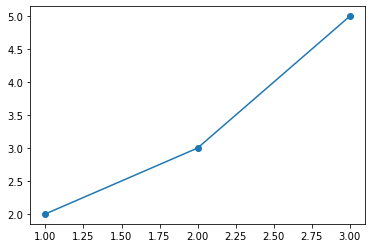

In [42]:
plot_wrapper(x,y)

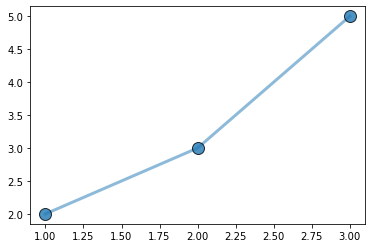

In [44]:
plot_wrapper(x,y,line_args={'lw':3,'alpha':0.5}, 
                 symb_args={'ms':12,'mec':'k','alpha':0.8})

Notice that normally, one can't feed a dictionary of key-values into a function. `ax.plot()` expects the keywords to look like `(...,lw=3,alpha=0.5)`. But because we used `**` on our dict, we *unpacked* it into the function. 

So, to summarize: `**` packs up a key=value pairs when used in a function definition, storing in a dict called `kwargs`, and then using `**kwargs` *again* in the *call* (rather than definition) of another function will unpack that dictionary and pass the inputs to the function as desired. 


# Working with Images

Now that we're caught up on our function definitions, documentation, and fancy use, let's dive into the science part: images!

## What's in an image

Astronomical images differ from standard images taken with a phone or DSLR camera primarily in that they both use older CCD technology and are typically "black and white", recording only intensity of light and not color. 

Knowledge about color instead comes from the placement of **filters** in front of the detectors which have a certain **bandpass**, allowing through light within a certain wavelength range and blocking light outside it. 

Thus, we only ever get one color at a time, unless the telescope splits incoming light by color using, for example, a **dichroic**, and then sends the two streams to two detectors with different filters simultaneously. 

This means that in some sense, single-band (i.e., one narrow-ish wavelength range) images are simple programmatically: They are 2D arrays in which each pixel (position in array) contains a single number: counts (in some units).

Usually, these units are counts in ADU (analog-to-digital units), which are roughly related to the actual counts of photons hitting the detector, via properties such as the gain of the system. 

Generally, we are not concerned with the exact units/gain/etc., because we back out the flux in photons (or energy, rather) via empirical calibrations with objects in the sky of known flux. 

### Narrowband Data and Continuum Subtraction

Many astronomical surveys are carried out with **broadband** filters, such as *U,B,V,R,I* or *Sloan-u,g,r,i,z*. These wide filters let in a lot of light, making for quicker observations. 

**Narrowband** filters, meanwhile, are generally used to target **emission lines** from gas. This includes the famous $H\alpha$ line, along with other ionization lines. 

Narrowband filters attempt to block all light except that just surrounding the emission line. But the emission seen (at some wavelength targeting a line) is the superposition of the emission line and the stellar continuum (i.e., the star light also coming from the galaxy/region). 

Thus, to use narrowband data properly, it must be **continuum subtracted**. Generally, this is done by scaling a broadband image also encompassing the line (so for $\lambda$6563 $H\alpha$. $R$-band) and then subtracting it from the narrowband image.

***Breakout Question: Discuss with your partner an obvious problem with recovering emission line fluxes using this method.***

**Why bring this up?** 

In Lab 2, we'll be working with a set of *HST* images in different bands, including $H\alpha$, and you'll have to perform a continuum subtraction. 

When working directly with images, the primary mode of operation is the measurement of flux in different regions on the sky -- in both broadband, and narrowband data.

http://www.astrofoto.ca/serge/DSO/M33_Ha-RC.htm

# Image Handling with Astropy

Lastly, we need to know how to work with astronomical images in Python. As "simple" 2D arrays, simply opening and plotting an image is easy. But keeping track of, say, the celestial coordinates associated with a pointing on the sky, is not. 

Luckily, the open-source `astropy` library has many tools that facilitate the streamlined handling of astronomical imaging. 

## Opening the Image 

Opening images using astropy is made easy using the `fits` file handler. We'll use a context manager to read in an image:

In [46]:
from astropy.io import fits 

with fits.open('antenna_Rband.fits') as hdu:
    header = hdu[0].header
    image = hdu[0].data

We can confirm we've loaded a 2D array:

In [48]:
image

array([[ 4.8691406,  5.432617 ,  5.713867 , ..., 11.48584  , 11.48584  ,
        11.48584  ],
       [ 5.573242 ,  5.713867 ,  5.291504 , ..., 11.48584  , 11.48584  ,
        11.48584  ],
       [ 6.4179688,  5.573242 ,  5.573242 , ..., 11.48584  , 11.48584  ,
        11.48584  ],
       ...,
       [11.48584  , 11.48584  , 11.48584  , ...,  6.2768555,  5.432617 ,
         5.9956055],
       [11.48584  , 11.48584  , 11.48584  , ...,  5.291504 ,  5.432617 ,
         5.573242 ],
       [11.48584  , 11.48584  , 11.48584  , ...,  5.291504 ,  4.8691406,
         3.4614258]], dtype=float32)

We can make a basic plot showing it:

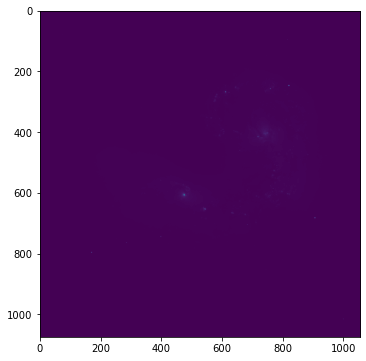

In [50]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(image)

That may not have looked like much, but it did at least confirm we have a 2D image. Let's tweak some settings. 

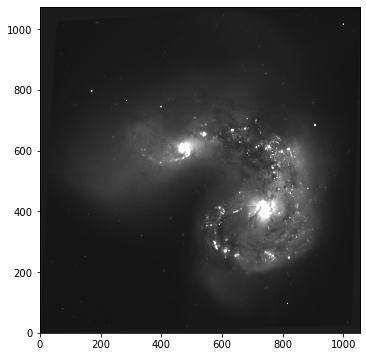

In [58]:
import numpy as np
fig, ax = plt.subplots(figsize=(6,6))
m = np.mean(image)
s = np.std(image)
ax.imshow(image,origin='lower',vmin=m-s,vmax=m+5*s,cmap='gray');

Next, we need to plot with our $x$ and $y$ axes representing sky coordinate (RA/DEC) rather than pixel position. For this, we'll need to use `astropy`'s `World Coordinate System` module. There are several defined coordinate systems on the sky, but for this class, we'll primarily be using RA and DEC. (i.e., equitorial coordinates measured in hour angles and degrees). 

In [59]:
from astropy.wcs import WCS 

wcs_im = WCS(header)

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


The wcs for a given image is constructed from the image header, where some information about the pixel scale and image pointing are stored. Notice here we got a warning. This happens sometimes with *HST* images that are mosaics of pointings that have already been drizzled (an image alignment/combination process). We need to remove the mentioned coefficients.

The following will be provided for lab:

In [60]:
def strip_SIP(header):
    A_prefixes = [i for i in header.keys() if i.startswith('A_')]
    B_prefixes = [i for i in header.keys() if i.startswith('B_')]
    for a,b in zip(A_prefixes,B_prefixes):
        del header[a]
        del header[b]
    return header

In [61]:
header_fixed = strip_SIP(header)
wcs = WCS(header_fixed)

We are now ready to plot our image in celestial coordinates. Our game plan is to use `matplotlib`'s `projection`. You may be familiar with this as the way to make an axis, e.g., in polar coordinates. `Astropy` `WCS` objects can be treated as projections in `matplotlib`. Below I show two ways to initialize an axis with our new wcs projection.

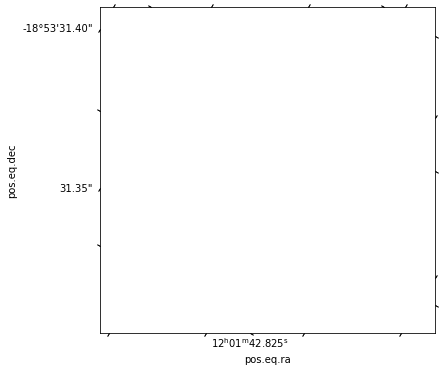

In [62]:
fig, ax = plt.subplots(figsize=(6,6),subplot_kw={'projection':wcs})

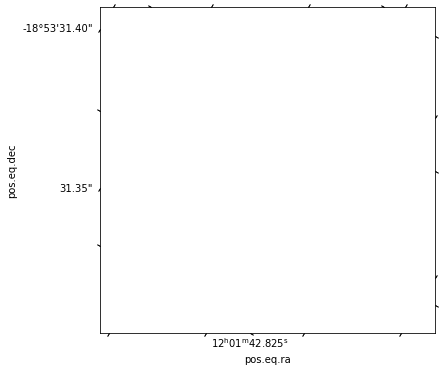

In [63]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection=wcs)

The two methods work equally well. The former is slightly preferred, as it makes it easy to make multiple panels with a wcs projection. 

Now, all we have to do, is plop our image into it:

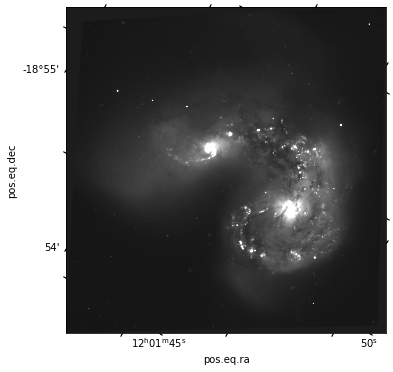

In [64]:
fig, ax = plt.subplots(figsize=(6,6),subplot_kw={'projection':wcs})
ax.imshow(image,origin='lower',vmin=m-s,vmax=m+5*s,cmap='gray');

In [65]:
ax

<WCSAxesSubplot:xlabel='pos.eq.ra', ylabel='pos.eq.dec'>

### Lab Preview 

In the lab, you'll be working with the same image of the Antenna galaxy, in several bands. In addition to the basic reading in and use of header/wcs, you'll be learning about `SkyCoord`, the `astropy` handler for coordinates, and `units` which is a module we'll be discussing throughout class. You'll use `Cutout2D` to make zoom in plots of the image while retaining coordinate information. And you'll use the `photutils` package and `sep` to find sources and perform some aperture photometry. 